# Topic Predicting Bank Customer Churn
## Customer Churn with Logistic Regression

#### Tổng quan về bộ dữ liệu
- Tập dữ liệu chứa thông tin toàn diện về nhân khẩu học của khách hàng, đó là Độ tuổi, Vị trí và Giới tính. Các biến có trong dữ liệu bao gồm, Điểm tín dụng (điểm thể hiện bản tóm tắt lịch sử tín dụng của khách hàng ngân hàng và cho biết khả năng hoàn trả số tiền đã vay), Thời hạn (điều này cho thấy khách hàng đã làm việc với ngân hàng được bao lâu), Số dư (số tiền một khách hàng có trong tài khoản của họ), NumOfProducts (số lượng sản phẩm mà khách hàng ngân hàng đã mua qua ngân hàng), HasCrCard (biểu thị xem khách hàng có thẻ tín dụng hay không), IsActiveMember (cho chúng tôi biết liệu khách hàng có đang hoạt động hay không), EstimatedSalary (thể hiện mức lương ước tính của khách hàng ngân hàng), Bị bỏ rơi (cho biết khách hàng có bị rời bỏ hay không), Khiếu nại (cho chúng tôi biết nếu khách hàng đã khiếu nại), Điểm hài lòng (cho biết mức độ hài lòng của khách hàng với ngân hàng) dịch vụ), Loại thẻ (biểu thị loại thẻ mà khách hàng ngân hàng nắm giữ), Điểm kiếm được (Là số điểm tích lũy của khách hàng dựa trên hoạt động hoặc cách sử dụng ngân hàng của họ). Dữ liệu này có thể giúp làm sáng tỏ các yếu tố thúc đẩy việc rời bỏ khách hàng của ngân hàng và đưa ra các phương pháp tiếp cận thực tế để dự đoán hành vi rời bỏ.

- Tập dữ liệu được sử dụng trong phân tích dự án này được lưu trữ trong tệp CSV, được lấy từ Kaggle và thuộc sở hữu của Dhoni (Tác giả) và Radheshyam Kollipara (Cộng tác viên). Dựa trên tính toán khả năng sử dụng của Kaggle, dữ liệu hoàn chỉnh, đáng tin cậy và được cấp phép. Dữ liệu đã được cập nhật hai tháng trước và có khả năng sử dụng 100%.

- Là phụ trách bộ phận chăm sóc khách hàng bạn nhận thấy việc phải xây dựng một mô hình
Machine Learning để dự đoán việc khách hàng sẽ ra đi hay ở lại. Công việc này vô cùng quan
trọng vì giữ chân được khách hàng càng lâu doanh nghiệp của bạn sẽ càng tiết kiệm được
chi phí và tăng doanh thu.

# Table of Contents
[1. Data Preparation](#1data-preparation)

[2. Explore Data](#2-explore-data)

[3. Explore Variables](#3-explore-variables)

[3.1 Defines the variable's properties](#)

[3.2 Univariate Analysis](#32-univariate-analysis)

[3.3 Bivariate Analysis and ANOVA](#33-bivariate-analysis-and-anova)

[4. Correlation Analysis](#4-correlation-analysis)

[5. Data Pre-processing](#5-data-pre-processing)

[5.1 Detecting and Handling the Outlier](#51-detecting-and-handling-the-outlier)

[5.2 Normalization Data](#52-normalization-data)

[5.3 Categorical Data Encoding](#53-categorical-data-encoding)

[6. Logistic Regression with Customer Churn](#6-logistic-regression-with-customer-churn)

[6.1 Original Data](#61-original-data)

[6.2 Resampling Data](#62-resampling-data)

[7. Final for Customer Churn](#7-final-for-customer-churn)

[8. Conclusion](#8-conclusion)

## 1.Data preparation

### Import library and Load Data From CSV File

In [145]:
# Import các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
# Đọc dữ liệu, kiểm tra dữ liệu
df = pd.read_csv('Customer-Churn-Records.csv')

## 2. Explore Data

In [147]:
# Kích thước của DataFrame, bao gồm số lượng hàng và cột.
df.shape
# Bộ dữ liệu có 10.000 dòng và 18 cột

(10000, 18)

In [148]:
# Tổng quan về dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [149]:
# Đổi tên cột 'Geography' thành 'Country' và cột 'Exited' thành 'Churned'

df.rename(columns={"Geography":"Country", "Exited":"Churned"}, inplace=True)

# Chuyển đổi kiểu dữ liệu của cột 'CustomerId' từ kiểu số thành kiểu chuỗi

df["CustomerId"]=df["CustomerId"].astype(str)

In [150]:
# Kiểm tra dữ liệu có bị null hay không.
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Country               0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Churned               0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [151]:
# Kiểm tra các dòng bị trùng lặp
df.duplicated().sum()

0

In [152]:
# Đọc 5 dòng đầu tiên
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [153]:
# Đọc 5 dòng cuối
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [154]:
# Thống kê mô tả bộ dữ liệu
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


- Bộ dữ liệu có 10.000 dòng
- CreditScore: Điểm tín dụng nằm trong khoảng 350-850
- Age: Độ tuổi trung bình là 39, người trẻ nhất: 18 tuổi, người già nhất: 92 tuổi, 75% số người trong bộ dữ liệu là dưới 44 tuổi.
- Tenure: Cho biết số năm mà khách hàng đã ở với ngân hàng bao lâu.
- Balance: Số dư trong tài khoản
- NumOfProducts: Số sản phẩm mà khách hàng đã mua thông qua ngân hàng
- HasCrCard: Có hay không có thẻ tín dụng (0=Không,1=Có)
- IsActiveMember: Khách hàng có tư cách thành viên đang hoạt động không (0=Không,1=Có)
- EstimatedSalary: Mức lương thu nhập ước tính của khách hàng
- Churned: Khách hàng đã rời bỏ sử dụng dịch vụ hay chưa (0=Không,1=Có)
- Complain: Khách hàng có hoặc không phàn nàn (0=Không,1=Có)
- Satisfaction Score: Cho biết mức độ hài lòng của một khách hàng với dịch vụ ngân hàng.
- Point Earned: Số điểm tích lũy bởi một khách hàng

In [155]:
# Dựa trên thông tin trên ta thấy các cột không dùng trong model là:
# RowNumber, CustomerId, Surname

In [156]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)
df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 3. Explore Variables

### 3.1 Defines the variable's properties

In [157]:
# Xác định cột chứa biến phân loại
df.select_dtypes(include='object').columns

Index(['Country', 'Gender', 'Card Type'], dtype='object')

- Biến Category có 3 cột: 'Country', 'Gender', 'Card Type'

In [159]:
# Biến định lượng Quantitative
# Categorical & Continueous
df.select_dtypes(exclude='object').columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churned', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')

### 3.2 Univariate Analysis

#### Gender

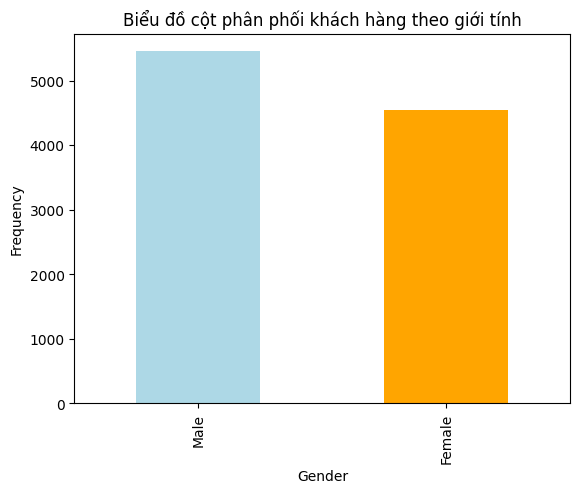

In [160]:
df["Gender"].value_counts().plot(kind="bar",color = ['lightblue','orange'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Biểu đồ cột phân phối khách hàng theo giới tính")
plt.show()

- Số lượng khách hàng có giới tính nam nhiều hơn số lượng khách hàng có giới tính nữ

#### Age

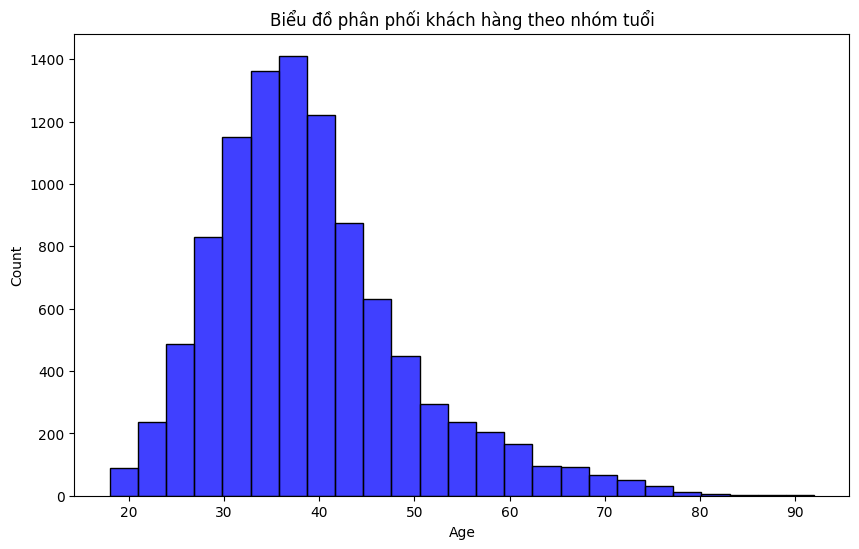

In [161]:
# Biểu đồ phân phối khách hàng theo nhóm tuổi
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',bins=25,color='b')
plt.title('Biểu đồ phân phối khách hàng theo nhóm tuổi')
plt.show()

- Đồ thị phân phối lệch phải
- Phần lớn khách hàng của ngân hàng ở độ tuổi 30-45. Tệp khách hàng của ngân hàng thuộc nhóm khách hàng trẻ.

In [162]:
age_df = df.groupby(by=['Age','Churned']).agg('count')
age_df.reset_index(drop=False,inplace=True)
age_df_inchurned = age_df[age_df['Churned'] == 0][['Age','CreditScore']]
age_df_inchurned = age_df_inchurned.rename(columns={'CreditScore':'Count_inchurned'})

age_df_churned = age_df[age_df['Churned'] == 1][['Age','CreditScore']]
age_df_churned = age_df_churned.rename(columns={'CreditScore':'Count_churned'})

age_vs_churned = pd.merge(age_df_inchurned,age_df_churned,how='outer',left_on='Age',right_on='Age')
age_vs_churned['Ratio'] = age_vs_churned.fillna(0,inplace=True)

age_vs_churned['Ratio'] = age_vs_churned['Count_churned']/(age_vs_churned['Count_churned']+age_vs_churned['Count_inchurned'])*100
age_vs_churned

,Age,Count_inchurned,Count_churned,Ratio
0,18,20,2.0,9.090909
1,19,26,1.0,3.703704
2,20,38,2.0,5.000000
3,21,50,3.0,5.660377
4,22,72,12.0,14.285714
...,...,...,...,...
65,83,1,0.0,0.000000
66,84,1,1.0,50.000000
67,85,1,0.0,0.000000
68,88,1,0.0,0.000000


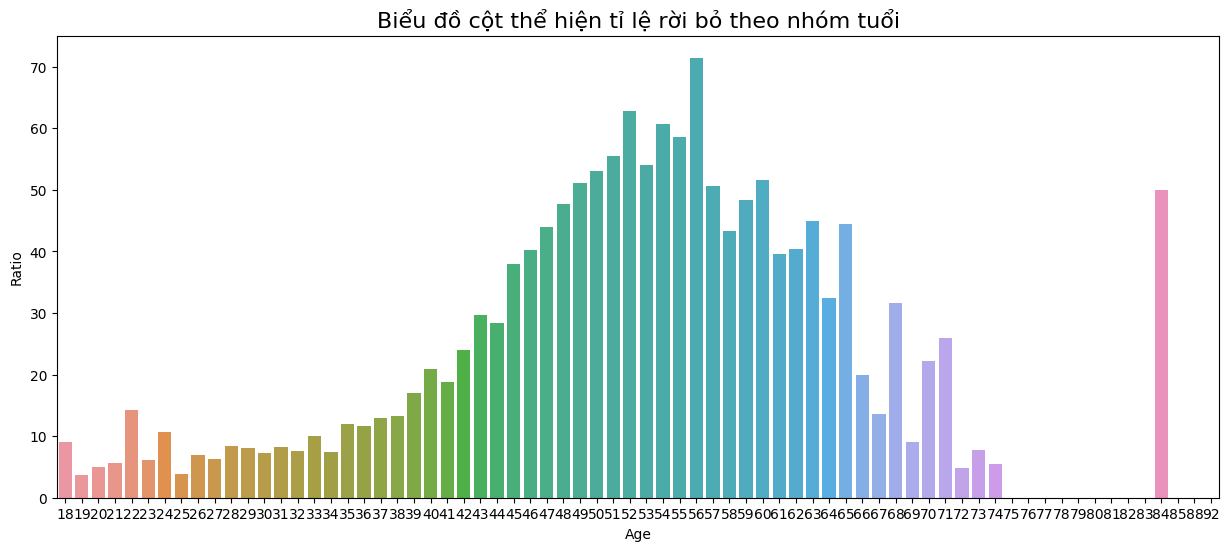

In [163]:
fig, ax = plt.subplots(figsize =(15,6))
sns.barplot(data=age_vs_churned,x='Age',y='Ratio')
plt.title('Biểu đồ cột thể hiện tỉ lệ rời bỏ theo nhóm tuổi',fontsize=16)
plt.show()

- Tỉ lệ người rời bỏ cao nhất rơi vào tuổi 56, khoảng tuổi có tỉ lệ rời bỏ cao nhất là 45-65.
- Khác biệt ở độ tuổi 84, độ tuổi có sự tăng vọt tỉ lệ rời bỏ cao.

#### Tenure

In [164]:
df_ten_exit = df[df['Churned'] == 1].groupby('Tenure').agg('count')
df_ten_exit.reset_index(drop=False,inplace=True)
df_ten_exit = df_ten_exit[['Tenure','CreditScore']]
df_ten_exit = df_ten_exit.rename(columns={'CreditScore':'Count'})

df_ten_inexit = df[df['Churned'] == 0].groupby('Tenure').agg('count')
df_ten_inexit.reset_index(drop=False,inplace=True)
df_ten_inexit = df_ten_inexit[['Tenure','CreditScore']]
df_ten_inexit = df_ten_inexit.rename(columns={'CreditScore':'Count'})

df_ten = pd.merge(df_ten_exit,df_ten_inexit,how='outer',on='Tenure',suffixes=('_exit','_inexit'))

df_ten['Ratio'] = df_ten['Count_exit']/(df_ten['Count_exit'] + df_ten['Count_inexit'])*100
df_ten

,Tenure,Count_exit,Count_inexit,Ratio
0,0,95,318,23.002421
1,1,232,803,22.415459
2,2,201,847,19.179389
3,3,213,796,21.110010
4,4,203,786,20.525784
5,5,209,803,20.652174
6,6,196,771,20.268873
7,7,177,851,17.217899
8,8,197,828,19.219512
9,9,214,770,21.747967


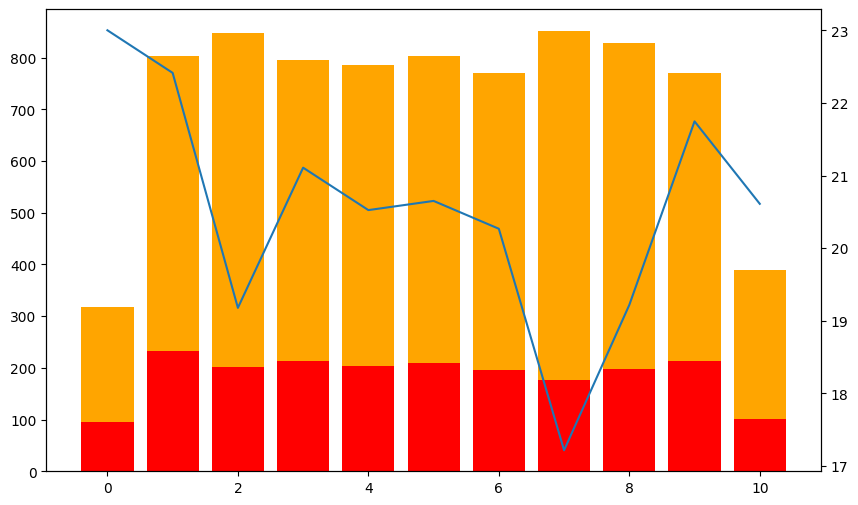

In [165]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=df_ten['Tenure'],height= df_ten['Count_inexit'], label = 'Count_Inexit', color ='Orange')
ax.bar(x=df_ten['Tenure'],height= df_ten['Count_exit'], label = 'Count_exit', color ='red')
ax2= ax.twinx()
ax2.plot(df_ten['Tenure'],df_ten['Ratio'])
plt.show()

- Nhận xét, từ 1-9 năm khách hàng sử dụng dịch vụ chiếm số lượng nhiều nhất. Ta nhận thấy rằng xu hướng tỉ lể rời bỏ giảm dần trong khoảng thời gian khách hàng sử dụng dịch vụ từ năm 1 đến năm thứ 7. Về cơ bản thì churned rate qua từng năm xấp xỉ 17-20%.
- Chú ý: Tại Tenure = 7, khách hàng có thâm niên sử dụng 7 năm dịch vụ thì Churned Ratio thấp xuống đáng kể ?

#### Estimated Salary

In [166]:
# Lấy ra 2 cột dữ liệu 'Churned','EstimatedSalary' và các cột dữ liệu có điều kiện là cột giới tính là nữ.
df_sal_churned_fe = df[df['Gender'] == 'Female'][['Churned','EstimatedSalary']]

# Tính toán mức lương/thu nhập trung bình nhóm theo mức độ rời bỏ có hoặc không theo giới tính nữ
df_sal_churned_fe.groupby('Churned').mean()

,EstimatedSalary
Churned,
0,99816.071486
1,102948.986093


In [167]:
df_sal_churned_ma = df[df['Gender'] == 'Male'][['Churned','EstimatedSalary']]
df_sal_churned_ma.groupby('Churned').mean()

,EstimatedSalary
Churned,
0,99660.223205
1,99686.650656


- Nhận xét, nhìn chung mức lương ước tính trung bình của nam và nữ tương đối xấp xỉ nhau.

#### Country

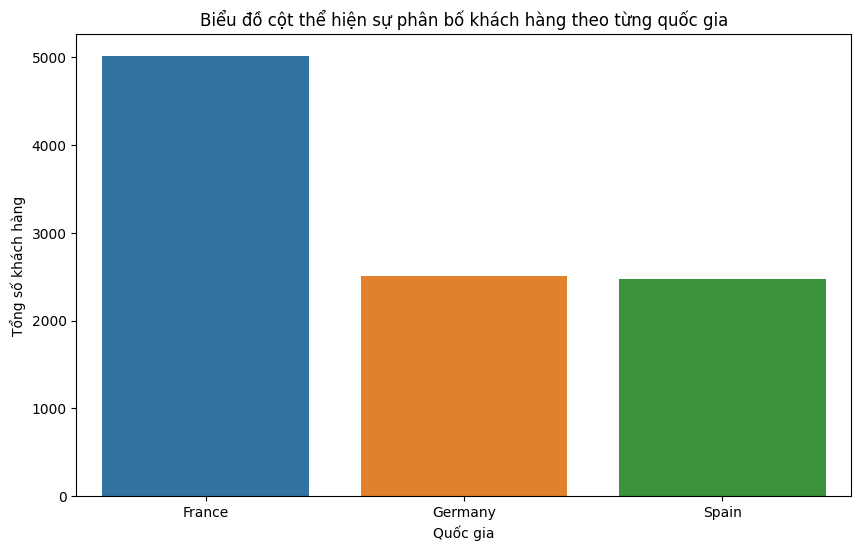

In [168]:
# Biểu đồ cột thể hiện sự phan bố khách hàng theo từng quốc gia
df_geo = df.groupby('Country').agg('count')
df_geo.reset_index(inplace = True, drop= False)
df_geo = df_geo[['Country','CreditScore']]
df_geo.rename(columns={'CreditScore':'Count'},inplace = True)
df_geo

# Vẽ biểu đồ cột thể hiện sự phân bố khách hàng theo từng quốc gia
plt.figure(figsize=(10.,6))
sns.barplot(data=df_geo,x='Country',y='Count')
plt.ylabel('Tổng số khách hàng')
plt.xlabel('Quốc gia')
plt.title('Biểu đồ cột thể hiện sự phân bố khách hàng theo từng quốc gia')
plt.show()

- Nhận xét, trên biểu đồ ta có thể thấy rằng hầu hết khách hàng của ngân hàng đa quốc gia đều đến từ Pháp. Số lượng khách hàng đến từ Đức cao hơn một chút so với khách hàng đến từ Tây Ban Nha.

In [169]:
df_geo_churned = df[df['Churned'] == 1].groupby('Country').agg('count')
df_geo_churned.reset_index(drop=False,inplace=True)
df_geo_churned = df_geo_churned[['Country','CreditScore']]
df_geo_churend = df_geo_churned.rename(columns={'CreditScore':'Count'},inplace = True)
df_geo_churned
df_geo['Count_Churned'] = df_geo_churned['Count']
df_geo['Ratio'] = df_geo['Count_Churned']/df_geo['Count']*100
df_geo

,Country,Count,Count_Churned,Ratio
0,France,5014,811,16.174711
1,Germany,2509,814,32.443204
2,Spain,2477,413,16.673395


- Nhìn biểu đồ, ta có thể nhìn thấy rằng tỉ lệ rời bỏ của khách hàng có quốc tịch Đức chiếm tỉ lệ cao nhất là 32.44%.
- Mặc dù quốc gia Pháp có tỉ lệ khách hàng tham gia cao nhưng tỉ lệ rời bỏ vẫn thấp.

#### Balance

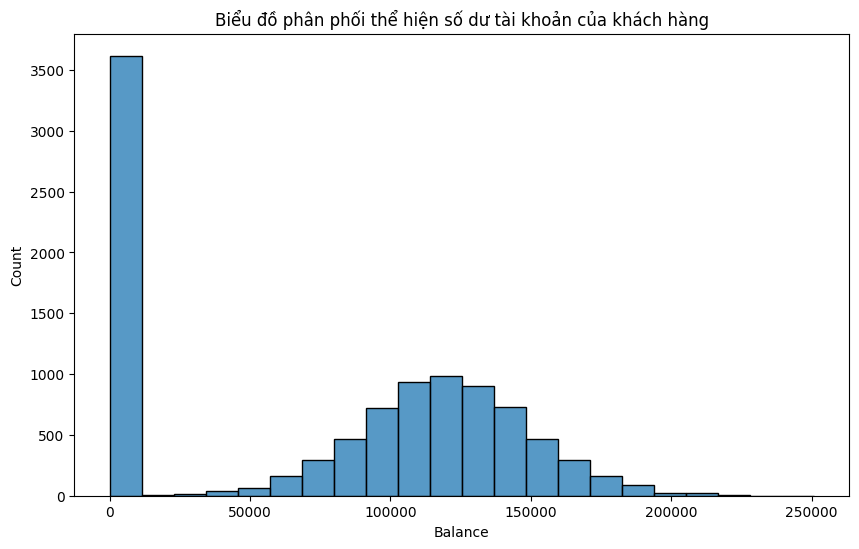

In [170]:
plt.figure(figsize=(10,6))
sns.histplot(df['Balance'])
plt.title('Biểu đồ phân phối thể hiện số dư tài khoản của khách hàng')
plt.show()

- Số lượng người có số dư tài khoản bằng 0 rất lớn, đây có thể là lí do góp phần làm cho tỉ lệ rời bỏ tăng lên.

In [171]:
# Thống kê mô tả cột 'Balance'
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

#### Binning Value

In [172]:
df1 = df[['Balance']]
my_bins = [0,14088.484086000004,76485.889288,97198.540000,127644.240000,250898.090000]
my_labels = ['Very low','Low','Medium','High','Very High']
df1['Equal_Bin'] = pd.cut(df1['Balance'], bins=5,labels = my_labels)
df1['Equal_Bin'].value_counts()

C:\Users\NK\AppData\Local\Temp\ipykernel_10784\3271109664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Equal_Bin'] = pd.cut(df1['Balance'], bins=5,labels = my_labels)


Medium       3828
Very low     3692
Low          1533
High          915
Very High      32
Name: Equal_Bin, dtype: int64

- Chia khoảng thành 5, ta nhận xét rằng là Số dư tài khoản mức thấp và mức quá thấp chiếm đa số
- Có thể là lí do khách hàng ngưng sử dụng sản phẩm/ dịch vụ

#### Has Credit Card

In [173]:
df_credit_card = df.groupby(by=['Churned','HasCrCard']).agg('count')
df_credit_card.reset_index(inplace=True,drop=False)
df_credit_card = df_credit_card[['Churned','HasCrCard','CreditScore']]
df_credit_card.rename(columns={'CreditScore':'count'},inplace=True)

# CHọn lọc cột dữ liệu khách hàng có rời bỏ và không rời bỏ
df_CrCard_inexit = df_credit_card[df_credit_card['Churned'] == 0 ]
df_CrCard_exit = df_credit_card[df_credit_card['Churned'] == 1]

df_credit_card = pd.merge(left=df_CrCard_inexit,right=df_CrCard_exit,on='HasCrCard',how='inner')
df_credit_card.drop(columns=['Churned_x','Churned_y'],inplace= True)
df_credit_card.rename(columns={'count_x':'count_inexit','count_y':'count_exit'},inplace=True)

# Tính Ratio tỉ lệ % rời bỏ
df_credit_card['Ratio'] = df_credit_card['count_exit']/(df_credit_card['count_exit']+df_credit_card['count_inexit'])*100
df_credit_card


,HasCrCard,count_inexit,count_exit,Ratio
0,0,2332,613,20.814941
1,1,5630,1425,20.198441


- Nhận xét, tỉ lệ rời bỏ của khách hàng khi không có hoặc có thẻ tín dụng là tương đối giống nhau.
- Có hay không có thể không ảnh hưởng lớn đến việc khách hàng có rời bỏ sản phẩm/dịch vụ.
- Chú ý, biến 'HasCrCard' được xem xét không được chọn làm đầu vào để chạy thuật toán LogisticRegression

#### CreditScore

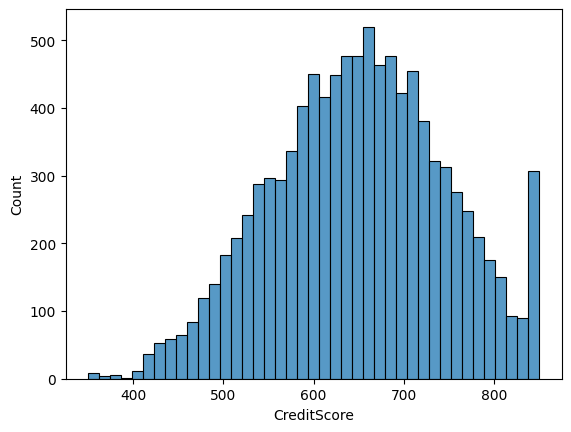

In [174]:
sns.histplot(df['CreditScore'])
plt.show()

In [175]:
df['CreditScore'].skew(), df['CreditScore'].kurtosis()

(-0.07160660820092675, -0.42572568480291295)

- Nhận xét, điểm tín dụng của khách hàng phân bố gần chuẩn, độ lệch hiển thị giá trị âm -0.07 gần xấp xỉ 0 nói lên độ lệch biểu dồ phân phối lệch trái, độ nhọn hiển thị giá trị âm -0.4 nói lên biểu đồ khá tập trung vào phần trung tâm. Biểu đồ gần như là phân phối xấp xỉ chuẩn.

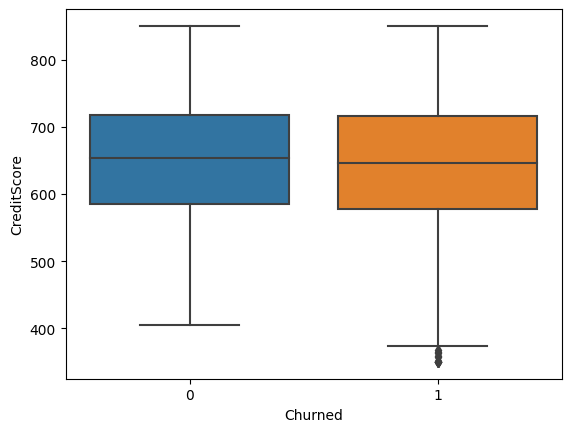

In [176]:
sns.boxplot(data=df,x='Churned',y='CreditScore')
plt.show()

- Dựa vào biểu đồ trên, ta có thể thấy với mức điểm số khá tương đồng khi khách hàng có hay không rời bỏ.
- Xem xét, biến CreditScore không được chọn làm biến đầu vào để chạy thuật toán.

#### Is Active Member

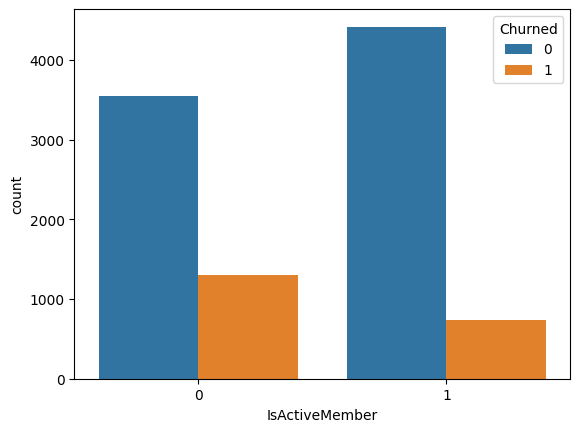

In [177]:
sns.countplot(data=df,x='IsActiveMember',hue='Churned')
plt.show()

#### Number of Products

In [178]:
df_products = df.groupby(by=['Churned','NumOfProducts']).agg('count')
df_products.reset_index(inplace=True,drop=False)
df_products = df_products[['Churned','NumOfProducts','CreditScore']]
df_products.rename(columns={'CreditScore':'count'},inplace = True)
df_products

,Churned,NumOfProducts,count
0,0,1,3675
1,0,2,4241
2,0,3,46
3,1,1,1409
4,1,2,349
5,1,3,220
6,1,4,60


- Nhận xét, với lớp không rời bỏ (lớp 0) với số lượt mua lớn, mua bé hơn 3 sản phẩm thì tỉ lệ ở lại nhiều.

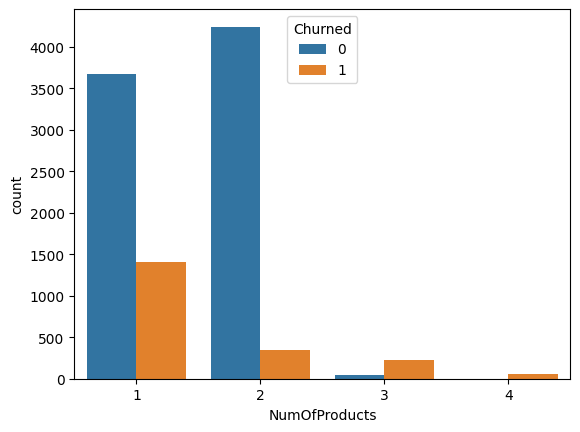

In [179]:
# Vẽ biểu đồ cột
sns.barplot(data=df_products,x='NumOfProducts',y='count',hue='Churned')
plt.show()

- Nhận xét, nhìn biểu đồ ta nhận thấy được với số lượng sản phẩm mua là 1 và 3 thì lớp rời bỏ (lớp 1) rất cao.

####

### 3.3 Bivariate Analysis and ANOVA

##### Phân tích hai biến Churned và Country

In [180]:
table1 = pd.crosstab(df['Churned'],df['Country'])
table1

Country,France,Germany,Spain
Churned,,,
0,4203,1695,2064
1,811,814,413


<AxesSubplot: xlabel='Churned'>

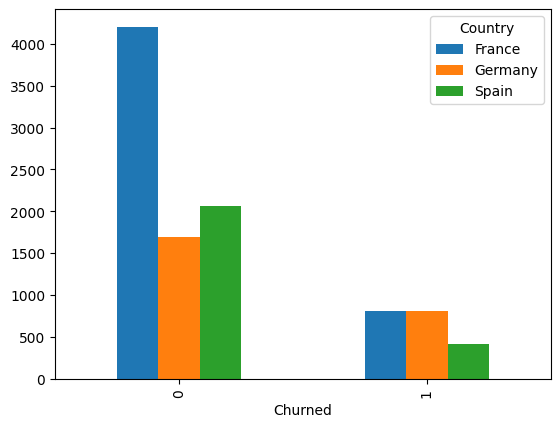

In [181]:
table1.plot(kind='bar')

- Churned luôn giữ một mức độ khá thấp.
- Liệu có sự liên quan giữa 'Churned' và 'Country' hay không ?

In [182]:
# Import thư viện chi-square
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [183]:
# Ho : Cột 'Churned' và 'Country' là hai biến độc lập
# H1 : Cột 'Churned' và 'Country' hai biến là không phải hai biến độc lập

In [184]:
stats, p, dof, expected = chi2_contingency(table1)

In [185]:
# Dùng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)

if abs(stats) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Dependent (Rejct H0)


- Nhận xét, vậy biến 'Country' và 'Churned' là hai biến độc lập. Suy ra, không dùng biến 'HasCrCard' dùng làm đầu vào để chạy thuật toán LogisticRegression

##### Phân tích hai biến Churned và HasCrCard

In [186]:
table2 = pd.crosstab(df['Churned'],df['HasCrCard'])
table2

HasCrCard,0,1
Churned,,
0,2332,5630
1,613,1425


<AxesSubplot: xlabel='Churned'>

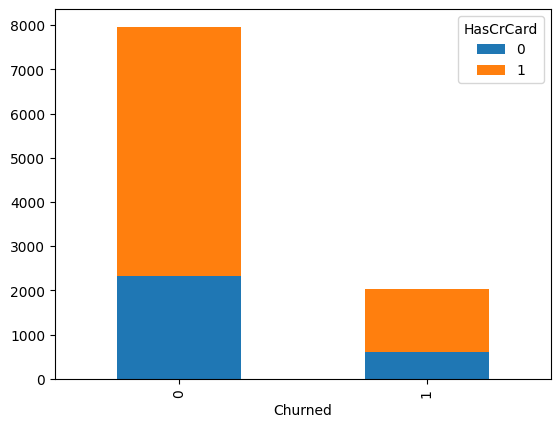

In [187]:
table2.plot(kind ='bar', stacked = True)

- Ta thấy được rằng là với đa số những khách hàng có thẻ tín dụng thì khả năng rời bỏ thấp hơn. Có 5630 khách hàng có thẻ tín dụng và 2332 khách hàng không có thẻ tín dụng, khả năng không rời bỏ dịch vụ.
- Chú ý liệu có sự liên quan giữa 'Churned' và 'HasCrCard' hay không ?

In [188]:
# Ho : Cột 'Churned' và 'HasCrCard' là hai biến độc lập
# H1 : Cột 'Churned' và 'HasCrCard' hai biến là không phải hai biến độc lập

In [189]:
stat, p, dof, expected = chi2_contingency(table2)

In [190]:
print('degres of freedom (dof) bậc tự do:', dof)

degres of freedom (dof) bậc tự do: 1


In [191]:
# Sử dụng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

3.841458820694124

In [192]:
if abs(stat) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Independent (Fail to Rejct H0)


In [193]:
# Sử dụng p-value để so sánh => Tính alpha
alpha = 1 - prob
if p <= alpha:
    print('Denpendent (Reject H0)')
else:
    print('Indenpendent (Fail to Reject H0)')

Indenpendent (Fail to Reject H0)


- Nhận xét, vậy biến 'HasCrCard' và 'Churned' là hai biến độc lập. Suy ra, không dùng biến 'HasCrCard' dùng làm đầu vào để chạy thuật toán LogisticRegression

##### Phân tích hai biến Churned và Gender

In [194]:
table3 = pd.crosstab(df['Churned'],df['Gender'])
table3

Gender,Female,Male
Churned,,
0,3404,4558
1,1139,899


<AxesSubplot: xlabel='Churned'>

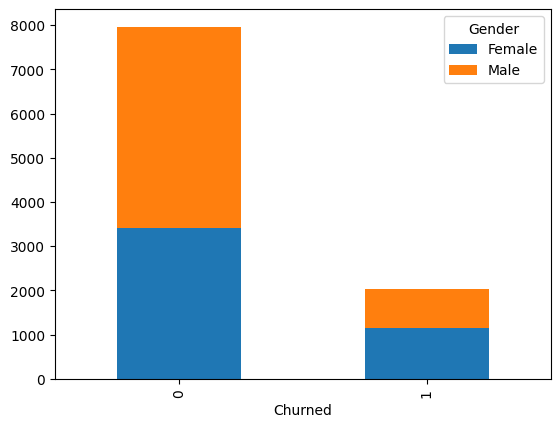

In [195]:
table3.plot(kind ='bar', stacked = True)

- Tỉ lệ nam và nữ với sự rời bỏ có sự tương đồng nhau, không thay đổi đáng kể.
- Chú ý liệu có sự liên quan giữa 'Churned' và 'Gender' hay không ?

In [196]:
# Ho : Cột 'Churned' và 'Gender' là hai biến độc lập
# H1 : Cột 'Churned' và 'Gender' hai biến là không phải hai biến độc lập

In [197]:
stat, p, dof, expected = chi2_contingency(table3)

In [198]:
# Sử dụng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

3.841458820694124

In [199]:
if abs(stat) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Dependent (Rejct H0)


- Tương quan khi nhận xét biểu đồ ta không thấy có mối quan hệ, nhưng phân tích chi-square ta nhận thấy được 2 biến có mối quan hệ với nhau.
- Biến Gender được dùng để làm biến đầu vào cho thuật toán LogisticRegression

##### Phân tích hai biến Churned và Card Type

In [200]:
table4 = pd.crosstab(df['Churned'],df['Card Type'])
table4

Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Churned,,,,
0,1961,2020,1987,1994
1,546,482,508,502


<AxesSubplot: xlabel='Churned'>

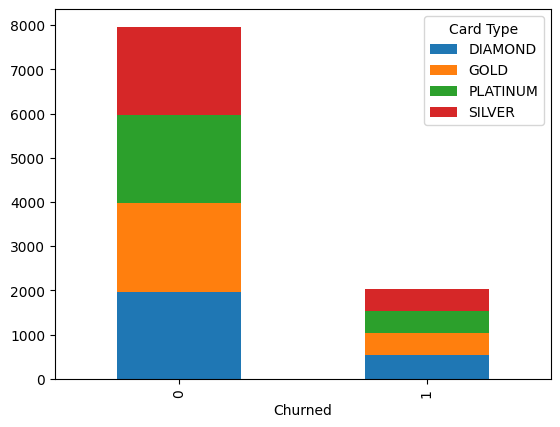

In [201]:
table4.plot.bar(stacked=True)

- Tỉ lệ đồng đều đối với mỗi loại Card Type. Nhìn vào biểu đồ chưa biết được là có mối quan hệ giữa hai biến hay là không ?
- Chú ý liệu có sự liên quan giữa 'Churned' và 'Card Type' hay không ?

In [202]:
# Ho : Cột 'Churned' và 'Card Type' là hai biến độc lập
# H1 : Cột 'Churned' và 'Card Type' hai biến là không phải hai biến độc lập

In [203]:
stat, p, dof, expected = chi2_contingency(table4)

In [204]:
# Sử dụng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

7.814727903251179

In [205]:
if abs(stat) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Independent (Fail to Rejct H0)


- Nhận xét, vậy biến 'Card Type' và 'Churned' là hai biến độc lập. Suy ra, không dùng biến 'Card Type' dùng làm đầu vào để chạy thuật toán LogisticRegression

##### Phân tích hai biến Churned và Satisfaction Score

In [206]:
table5 = pd.crosstab(df['Churned'],df['Satisfaction Score'])
table5

Satisfaction Score,1,2,3,4,5
Churned,,,,,
0,1545,1575,1641,1594,1607
1,387,439,401,414,397


<AxesSubplot: xlabel='Churned'>

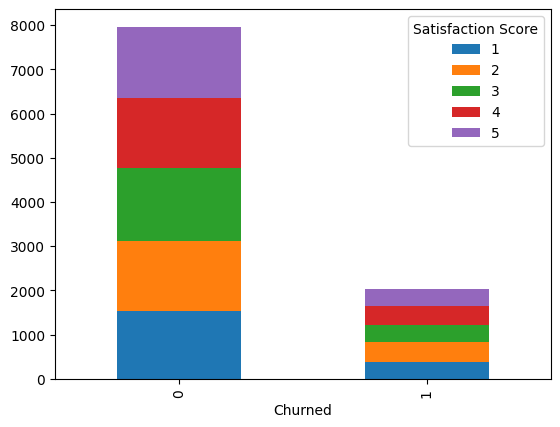

In [207]:
table5.plot.bar(stacked=True)

- Tỉ lệ đồng đều đối với mỗi điểm hài lòng. Nhìn vào biểu đồ chưa biết được là có mối quan hệ giữa hai biến hay là không ?
- Chú ý liệu có sự liên quan giữa 'Churned' và 'Satisfaction Score' hay không ?

In [208]:
# Ho : Cột 'Churned' và 'Satisfaction Score' là hai biến độc lập
# H1 : Cột 'Churned' và 'Satisfaction Score' hai biến là không phải hai biến độc lập

In [209]:
stat, p, dof, expected = chi2_contingency(table5)

In [210]:
# Sử dụng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

9.487729036781154

In [211]:
if abs(stat) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Independent (Fail to Rejct H0)


- Nhận xét, vậy biến 'Satisfaction Score' và 'Churned' là hai biến độc lập. Suy ra, không dùng biến 'Satisfaction Score' dùng làm đầu vào để chạy thuật toán LogisticRegression

##### Phân tích hai biến Churned và Is Active Member

In [212]:
table6 = pd.crosstab(df['Churned'],df['IsActiveMember'])
table6

IsActiveMember,0,1
Churned,,
0,3546,4416
1,1303,735


<AxesSubplot: xlabel='Churned'>

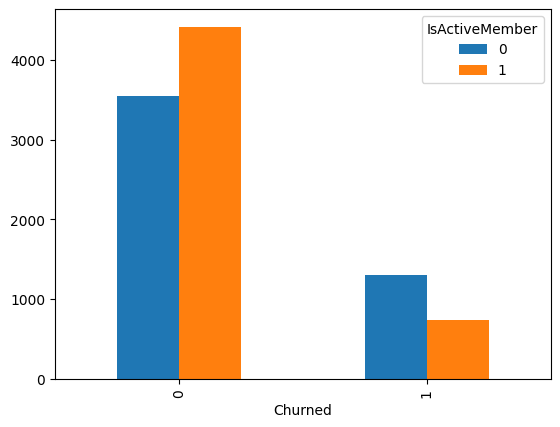

In [213]:
table6.plot.bar()

In [214]:
# Ho : Cột 'Churned' và 'IsActiveMember' là hai biến độc lập
# H1 : Cột 'Churned' và 'IsActiveMember' hai biến là không phải hai biến độc lập

In [215]:
stat, p, dof, expected = chi2_contingency(table6)

In [216]:
# Sử dụng Statistic để so sánh => Tính Critical Value
prob = 0.95
critical = chi2.ppf(prob,dof)
critical

3.841458820694124

In [217]:
if abs(stat) >= critical:
    print('Dependent (Rejct H0)')
else:
    print('Independent (Fail to Rejct H0)')

Dependent (Rejct H0)


## 4. Correlation Analysis

In [218]:
# Lọc các cột số
df_num = df.select_dtypes(include='number')
df_num.drop(columns='Churned',inplace=True)

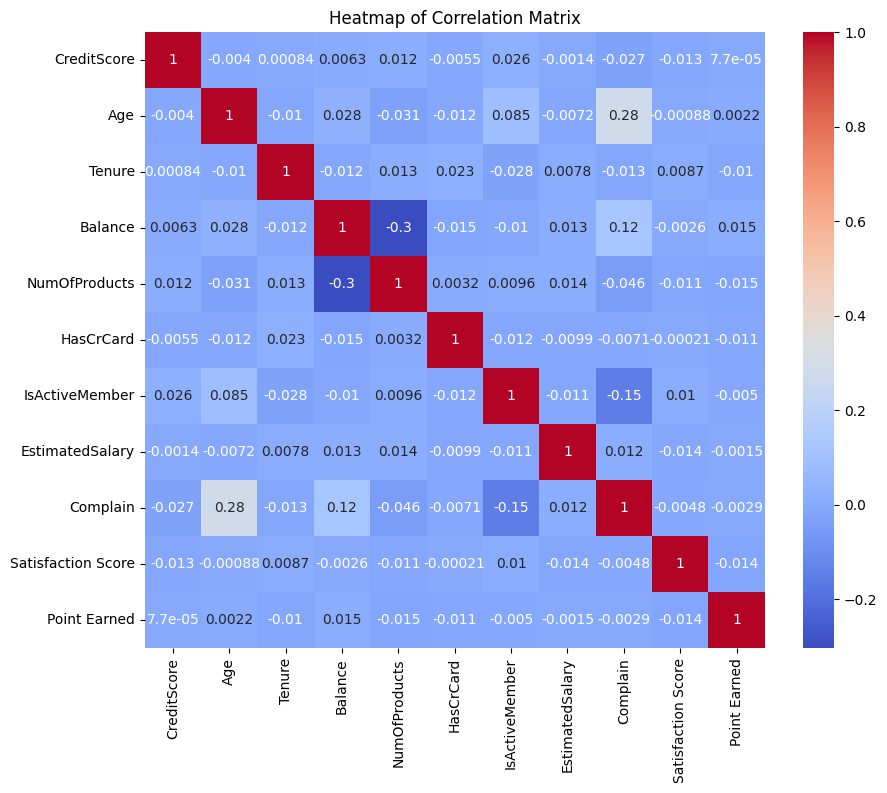

In [219]:
# Vẽ Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot = True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## 5. Data Pre-processing

### 5.1 Detecting and Handling the Outlier

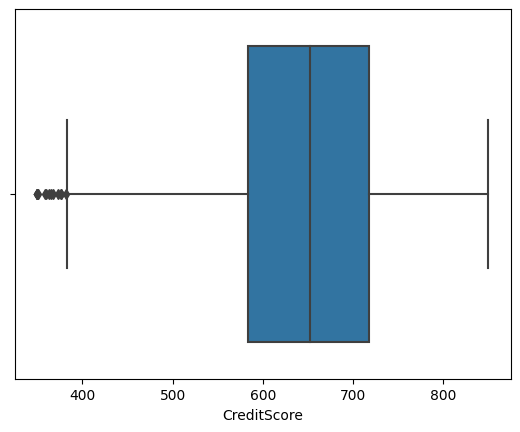

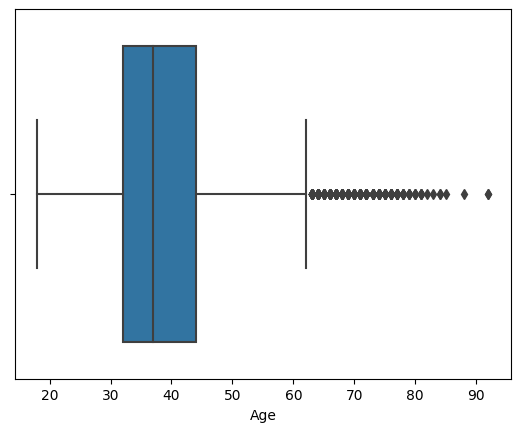

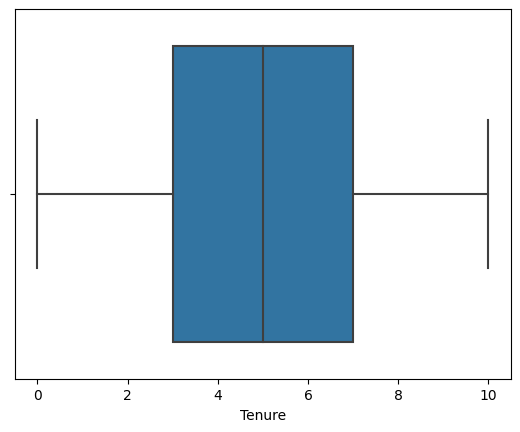

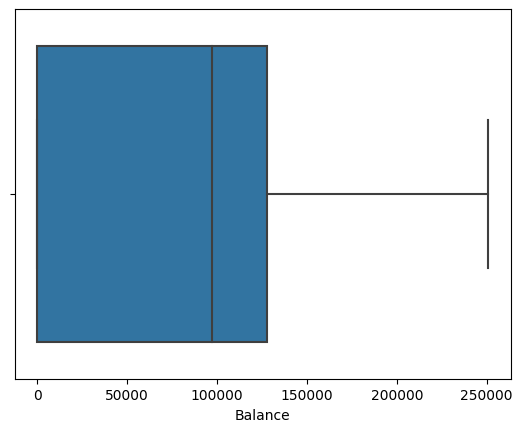

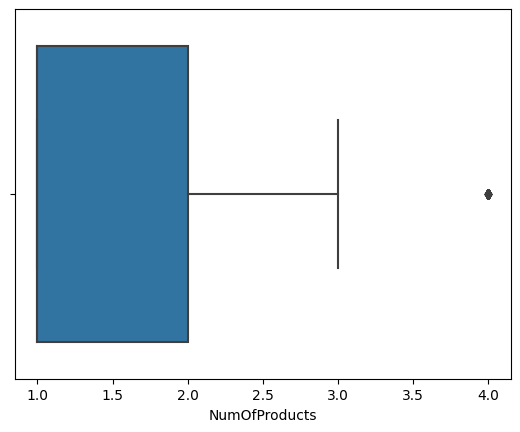

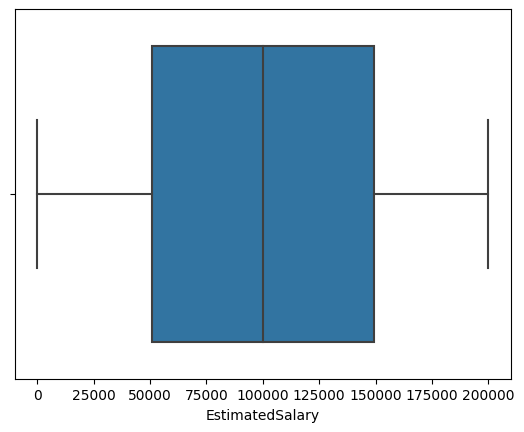

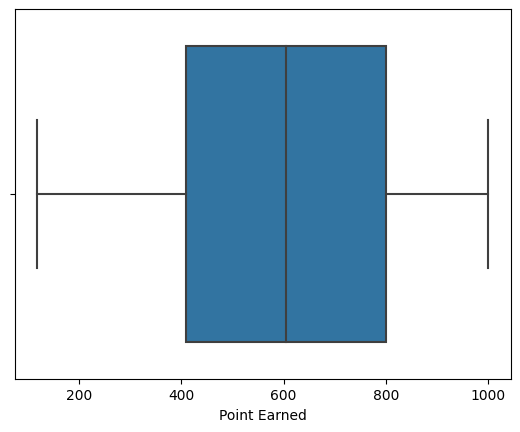

In [220]:
df_outlier = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']
for i in df_outlier:
    sns.boxplot(x=df[i])
    plt.show()

- Nhận xét, từ biểu đồ hộp để xác định giá trị ngoại lai (outlier), ta tiến hành loại bỏ giá trị ngoại lai (outlier) ở hai cột là Age và CreditScore

In [221]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]

Q1 = df['CreditScore'].quantile(0.25)
Q3 = df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['CreditScore'] > lower_bound) & (df['CreditScore'] < upper_bound)]
df

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


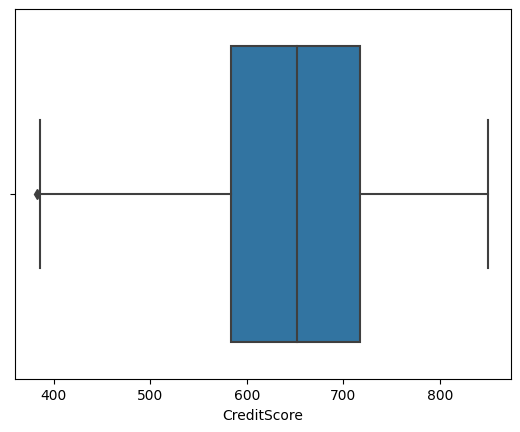

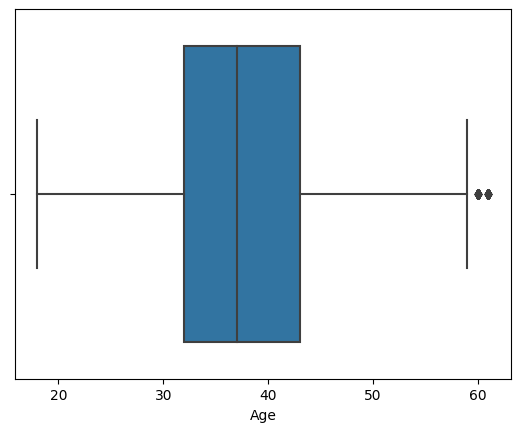

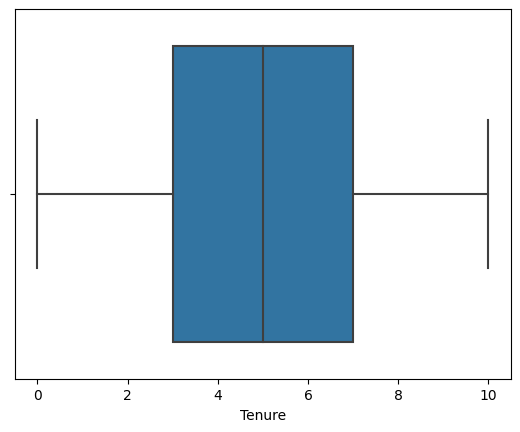

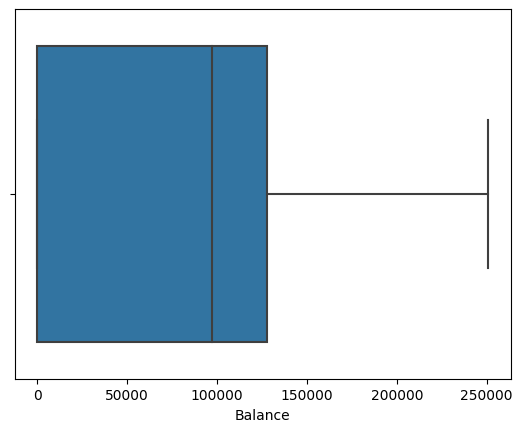

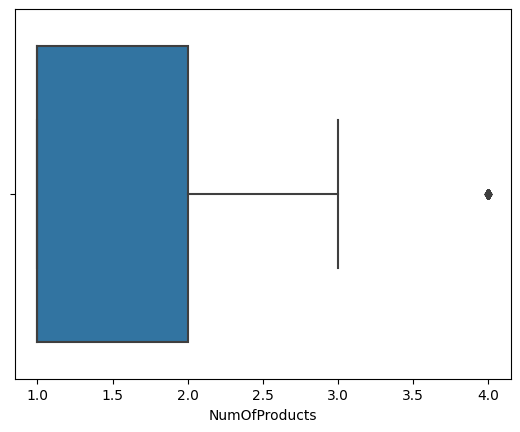

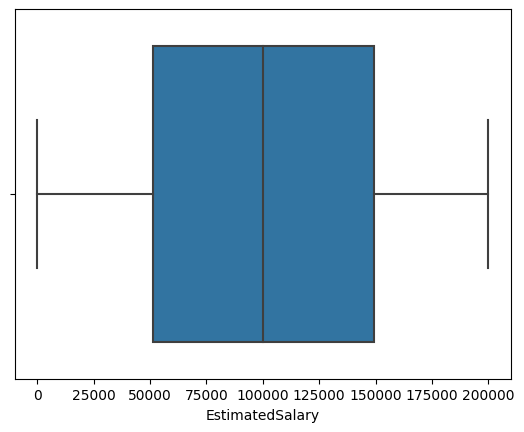

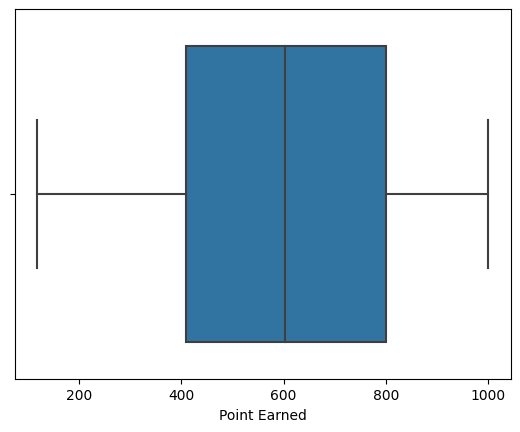

In [222]:
# Dữ liệu sau khi ta loại bỏ Outlier
df_outlier = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']
for i in df_outlier:
    sns.boxplot(x=df[i])
    plt.show()

In [223]:
df.shape

(9574, 15)

- Dữ liệu gốc ban đầu có 10.000 dòng, sau khi ta phát hiệu và loại bỏ outlier, dữ liệu còn lại 9574 dòng.

In [224]:
# Đọc 5 dòng dữ liệu đầu vào
df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### 5.2 Normalization Data

In [225]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

In [226]:
# Khởi tạo
sc = StandardScaler()

In [227]:
for i in ['CreditScore','Age','Balance','EstimatedSalary','Point Earned']:
     df[i] = sc.fit_transform(df[i].values.reshape(-1,1))

In [228]:
# Dữ liệu sau khi chuẩn hóa
df.head()

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Complain,Satisfaction Score,Card Type,Point Earned
0,-0.330456,France,Female,0.503360,2,-1.226236,1,1,1,0.021005,1,1,2,DIAMOND,-0.626934
1,-0.444979,Spain,Female,0.387603,1,0.116485,1,0,1,0.215653,0,1,3,DIAMOND,-0.662320
2,-1.548564,France,Female,0.503360,8,1.331756,3,1,0,0.239806,1,1,3,DIAMOND,-1.011748
3,0.502438,France,Female,0.156091,1,-1.226236,2,0,0,-0.109800,0,0,5,GOLD,-1.131172
4,2.074526,Spain,Female,0.619116,2,0.784625,1,1,1,-0.366159,0,0,5,GOLD,-0.799437


In [229]:
df.drop(columns=['HasCrCard','Card Type','Complain','Satisfaction Score','Point Earned'],axis=1,inplace = True)

### 5.3 Categorical Data Encoding

In [230]:
# Các thuộc tinh phân loại còn để chuẩn hóa dữ liệu
objects =  [ f for f in df.columns if df.dtypes[f] == 'object']
objects

['Country', 'Gender']

In [231]:
# Xem xét thuộc tính phân loại: Country
df.groupby(by='Country')['CreditScore'].count()

Country
France     4802
Germany    2407
Spain      2365
Name: CreditScore, dtype: int64

-  Dựa trên kết quả ta thấy có 3 quốc gia
-  Cần chuyển sang dữ liệu kiểu số

In [232]:
# Xem xét thuộc tính phân loại: Gender
df.groupby(by='Gender')['CreditScore'].count()

Gender
Female    4345
Male      5229
Name: CreditScore, dtype: int64

- Dựa trên kết quả ta thấy có 2 giới tính
- Cần chuyển sang dữ liệu kiểu số

In [233]:
# Mã hóa dữ liệu Encoder - dùng get_dummies
df_new = pd.get_dummies(df)
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Churned,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
0,-0.330456,0.503360,2,-1.226236,1,1,0.021005,1,1,0,0,1,0
1,-0.444979,0.387603,1,0.116485,1,1,0.215653,0,0,0,1,1,0
2,-1.548564,0.503360,8,1.331756,3,0,0.239806,1,1,0,0,1,0
3,0.502438,0.156091,1,-1.226236,2,0,-0.109800,0,1,0,0,1,0
4,2.074526,0.619116,2,0.784625,1,1,-0.366159,0,0,0,1,1,0


## 6. Logistic Regression with Customer Churn

In [234]:
# inputs: các cột còn lại trừ cột Churend
# output: cột Churned

In [235]:
X = df_new.drop(columns=['Churned'],axis=1)
y = df_new['Churned']

### 6.1 Original Data

In [236]:
# Import thư viện 'train_test_split' để chia tệp dữ liệu train vá test
from sklearn.model_selection import train_test_split

### Train/test Dataset

In [237]:
# Trainng Data 80% datasets, Test Data 20% datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [238]:
# Bộ dữ liệu training, biến đầu vào lấy 20 dòng đầu
X_train.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male
4426,0.585727,0.734872,6,-1.226236,2,1,1.606773,1,0,0,1,0
3679,-0.007710,-1.464497,7,1.346789,2,1,-1.247657,0,0,1,0,1
6157,-1.059239,-1.001472,3,-1.226236,2,0,0.799019,1,0,0,0,1
2592,-1.517331,0.271847,6,-0.459295,2,1,0.955027,0,1,0,0,1
8871,-1.923367,-0.885716,3,-1.226236,1,0,1.631856,1,0,0,1,0
4582,-1.558975,-0.075422,4,-1.226236,2,0,-1.524513,1,0,0,0,1
8417,-0.215934,-1.348741,5,-1.226236,2,0,1.434103,1,0,0,1,0
3421,-0.601147,0.156091,0,0.659561,1,0,1.700524,1,0,0,1,0
1263,-0.132644,0.503360,7,1.428191,1,0,-1.168976,1,0,0,1,0
584,-0.038944,1.545166,1,0.692197,2,0,-0.785751,0,1,0,1,0


In [239]:
# Bộ dữ liệu training, biến đàu ra lấy 20 dòng đầu
y_train.head(20)

4426    0
3679    0
6157    0
2592    0
8871    0
4582    0
8417    0
3421    0
1263    0
584     1
7320    0
8317    0
5423    0
5496    0
4153    1
7119    0
9089    0
8173    0
3452    1
2756    0
Name: Churned, dtype: int64

In [240]:
# Train/test dataset
print('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (7659, 12) (7659,)
Test set: (1915, 12) (1915,)


In [241]:
# Import thư viện 'LogisticRegression' để khởi tạo thuật toán
from sklearn.linear_model import LogisticRegression

In [242]:
# Khởi tạo LogisticRegression
model = LogisticRegression()

In [243]:
model.fit(X_train, y_train)

LogisticRegression()

### Evaluation

### Score

In [244]:
print('Train score: ', model.score(X_train,y_train))

Train score:  0.826478652565609


In [245]:
print('Test score: ', model.score(X_test,y_test))

Test score:  0.8240208877284595


In [246]:
# Tính toán xác suất của lớp cho tập dữ liệu thử nghiệm
# Bằng cách sử dụng hàm 'predict_proba'
yhat_test_proba = model.predict_proba(X_test)
yhat_test_proba[:5]

array([[0.15257557, 0.84742443],
       [0.93563617, 0.06436383],
       [0.92534322, 0.07465678],
       [0.94356802, 0.05643198],
       [0.91649301, 0.08350699]])

In [247]:
yhat_test = model.predict(X_test)
yhat_test[:5]

array([1, 0, 0, 0, 0], dtype=int64)

### Giá trị của các tham số trong mô hình Logistic Regression

In [248]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Country_France',
       'Country_Germany', 'Country_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [249]:
# Hệ số chặn
model.intercept_

array([-0.91824421])

In [250]:
# Hệ số hồi quy
model.coef_

array([[-0.01172475,  0.98883938, -0.01392397,  0.11231733, -0.1421533 ,
        -0.9083755 ,  0.02069411, -0.22964513,  0.52629685, -0.29646143,
         0.2715188 , -0.2713285 ]])

In [251]:
"""
    Công thức được hiểu là:
    P('Churned') = 1/(1+e^-logit)

    logit = B0 + B1.X1 + B2.X2 + ... Bn.X

    trong đó: B0 hệ số chặn (intercept) trong đó ẞ0 là điểm chặn của mô hình và
    các tham số beta khác là các hệ số mô hình ở trên

    Công thức của mô hình thuật toán LogisticRegression dành cho bộ dữ liệu này là:

    logit = 9.08542912 + -0.02366892*CreditScore + 1.07210714*Age + -0.02824994*Tenure + 0.09348367*Balance + -0.50669729*NumOfProducts
       + -1.31422981*IsActiveMember + 0.01645804*EstimatedSalary + -4.32280986*Country_France
       + -3.44014348*Country_Germany + -4.46983426*Country_Spain + -3.77025796*Gender_Female + -4.39078977*Gender_Male
    """


"\n    Công thức được hiểu là:\n    P('Churned') = 1/(1+e^-logit)\n\n    logit = B0 + B1.X1 + B2.X2 + ... Bn.X\n\n    trong đó: B0 hệ số chặn (intercept) trong đó ẞ0 là điểm chặn của mô hình và\n    các tham số beta khác là các hệ số mô hình ở trên\n\n    Công thức của mô hình thuật toán LogisticRegression dành cho bộ dữ liệu này là:\n\n    logit = 9.08542912 + -0.02366892*CreditScore + 1.07210714*Age + -0.02824994*Tenure + 0.09348367*Balance + -0.50669729*NumOfProducts\n       + -1.31422981*IsActiveMember + 0.01645804*EstimatedSalary + -4.32280986*Country_France\n       + -3.44014348*Country_Germany + -4.46983426*Country_Spain + -3.77025796*Gender_Female + -4.39078977*Gender_Male\n    "

### Predict New Data

In [252]:
'Dự đoán khách hàng có rời bỏ hay không dựa vào các thuộc tính:'
CreditScore = -1.132117
Age	= -0.306934
Tenure = 9
Balance	= 0.817186
NumOfProducts = 2
IsActiveMember = 0
EstimatedSalary	= -1.733206
Country_France	= 0
Country_Germany	= 1
Country_Spain =	0
Gender_Female =1
Gender_Male = 0

In [253]:
import math
logit = -0.93828579 + 0.01526452*CreditScore + 0.97797049*Age -0.01293542*Tenure + 0.12773042*Balance -0.12931887*NumOfProducts
-0.88600403*IsActiveMember + 0.02419594*EstimatedSalary - 0.2183004*Country_France + 0.47354836*Country_Germany -0.25529053*Country_Spain
+0.26851467*Gender_Female -0.26855724*Gender_Male

P_churned = 1/(1 + math.exp(-logit))
if P_churned >= 0.5:
    print('Xác suất rời bỏ: ',P_churned*100 ,'%' ,', Churned: Yes')
else:
    print('Xác suất rời bỏ: ',P_churned*100 ,'%' ,', Churned: No')

Xác suất rời bỏ:  17.85186120650828 % , Churned: No


### Accuracy Score

In [254]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [255]:
print("Test Accuracy is ", accuracy_score(y_test,yhat_test)*100,"%")

Test Accuracy is  82.40208877284594 %


### Confusion Matrix

In [256]:
from sklearn.metrics import confusion_matrix

In [257]:
cm = confusion_matrix(y_true = y_test, y_pred = yhat_test)

In [258]:
print('Confusion Matrix\n', cm)

Confusion Matrix
 [[1479   65]
 [ 272   99]]


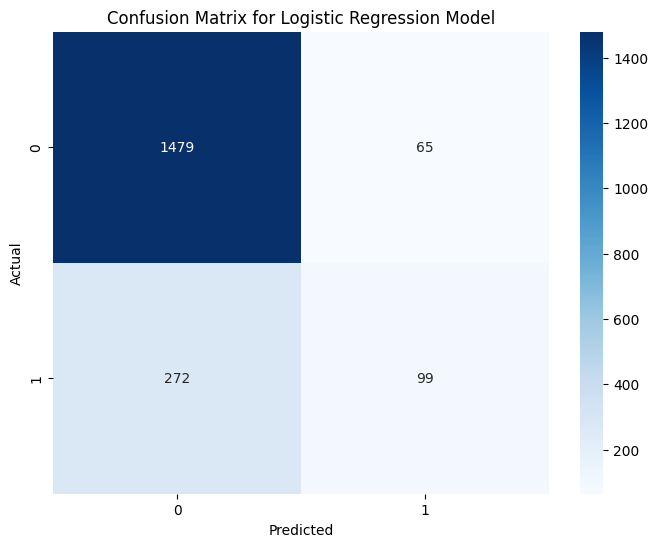

In [259]:
# Trực quan hóa confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

- Sai lầm loại I có số lượng các dự đoán sai lệch có tỉ lệ là: 4.2%. Thực tế có 1544 khách hàng khỏng rời bỏ nhưng trong đó dự đoán lệch có 65 khách hàng vào tình trạng rời bỏ. 
- Sai lầm loại II, mô hình dự đoán 272 khách hàng không thuộc tình trạng rời bỏ nhưng thực tế khách hàng đã rời bỏ. Sai lầm loại II với tỉ lệ: 73%.


### Classification Report

In [260]:
from sklearn.metrics import classification_report

In [261]:
print(classification_report(y_true = y_test, y_pred = yhat_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1544
           1       0.60      0.27      0.37       371

    accuracy                           0.82      1915
   macro avg       0.72      0.61      0.63      1915
weighted avg       0.80      0.82      0.80      1915



- Recall ở lớp 1 quá thấp, liệu có cách nào để tăng % recall lên cao

### ROC Score and AUC Score

In [262]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [263]:
yhat_test_proba = model.predict_proba(X_test)

In [264]:
yhat_test_proba[0:5]

array([[0.15257557, 0.84742443],
       [0.93563617, 0.06436383],
       [0.92534322, 0.07465678],
       [0.94356802, 0.05643198],
       [0.91649301, 0.08350699]])

In [265]:
score = yhat_test_proba[:, 1]

In [266]:
fpr, tpr, thresholds = roc_curve(y_test, score)

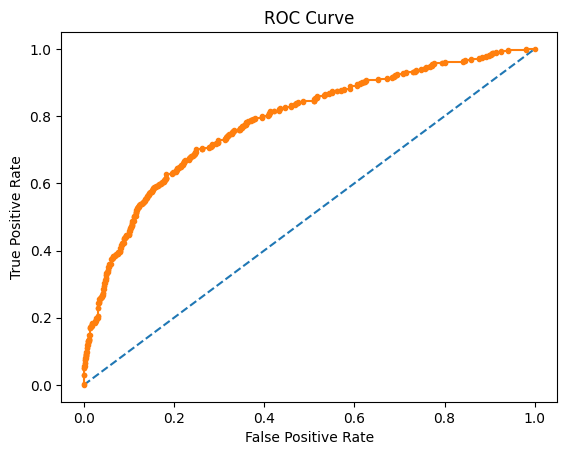

In [267]:
# Trực quan
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [268]:
auc(fpr, tpr)

0.7825335530634191

- Diện tích dưới đường cong ROC (Receiver Operating Characteristic). AUC = 0.7825422817479715 cho biết rằng mô hình phân loại có chất lượng khá tốt.
- Mô hình logistic regression có khả năng phân loại khách hàng có rời bỏ hay không ở mức độ khá tốt
- Giá trị AUC  như trên, thuật toán Logistic Regression có thể được đánh giá là có khả năng phân loại tốt, với khả năng phân biệt giữa các lớp dương và âm đáng tin cậy.

### 6.2 Resampling Data

In [269]:
# Import thư viện imblearn để khởi tạo SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE

In [270]:
# Khởi tạo
sm = SMOTE()

In [271]:
X_resample, y_resample = sm.fit_resample(X_train, y_train)

In [272]:
model_rs = LogisticRegression()

In [273]:
model_rs.fit(X_resample, y_resample)

LogisticRegression()

### Evaluation

### Score

In [274]:
# Đánh giá model tập train của bộ dữ liệu sau khi Resampling Data
model_rs.score(X_resample, y_resample)

0.7760203245369611

In [275]:
# Đánh giá bộ dữ liệu tập test
model_rs.score(X_test, y_test)

0.7446475195822454

In [276]:
yhat_test_rs = model_rs.predict(X_test)

### Confusion Matrix

In [277]:
cm_rs = confusion_matrix(y_true = y_test, y_pred = yhat_test_rs)

In [278]:
print('Confusion matrix:\n', cm_rs)

Confusion matrix:
 [[1198  346]
 [ 143  228]]


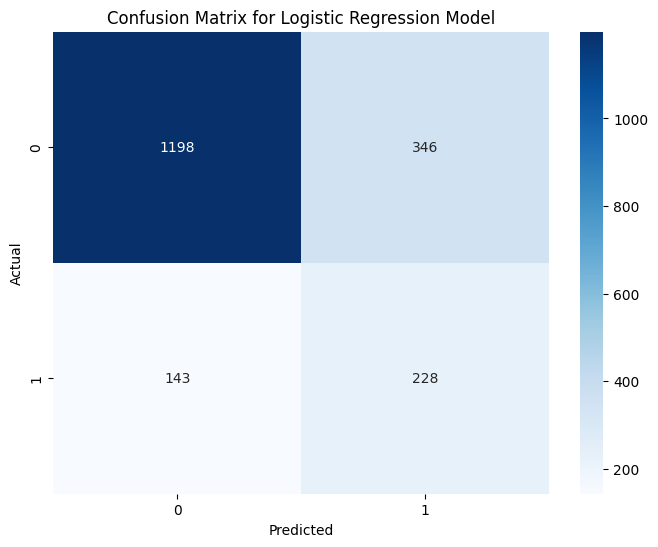

In [279]:
# Trực quan hóa confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rs, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### Classification Report

In [280]:
print(classification_report(y_true = y_test, y_pred = yhat_test_rs))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1544
           1       0.40      0.61      0.48       371

    accuracy                           0.74      1915
   macro avg       0.65      0.70      0.66      1915
weighted avg       0.80      0.74      0.76      1915



### ROC Score and AUC Score

In [281]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [282]:
# Tính toán xác suất của lớp cho tập dữ liệu thử nghiệm
# Bằng cách sử dụng hàm 'predict_proba'
yhat_test_proba = model_rs.predict_proba(X_test)

In [283]:
yhat_test_proba[0:5]

array([[0.02967257, 0.97032743],
       [0.88810526, 0.11189474],
       [0.88188137, 0.11811863],
       [0.81163836, 0.18836164],
       [0.82556186, 0.17443814]])

In [284]:
score = yhat_test_proba[:, 1]

In [285]:
fpr, tpr, thresholds = roc_curve(y_test, score)

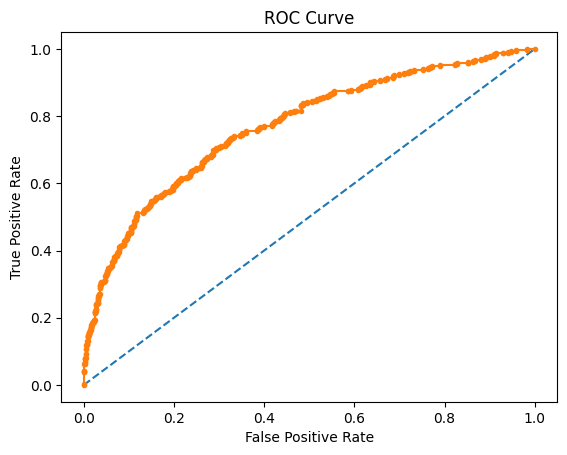

In [286]:
# Trực quan
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

- Dựa vào kết quả thu được khi tính ROC, ta thấy đường cong ROC của mô hình Logistic Regression chưa cao, chưa tiệm cận với điểm (0,1). Cho nên mô hình có thể chưa phù hợp với bộ dữ liệu. 

In [287]:
auc(fpr, tpr)

0.7688487214222868

## 7. Final for Customer Churn
- Class 0: high recall + high precision: lớp 0 được xử lý hoàn hảo bởi mô hình
- Class 1: low recall + high precision: Mô hình phát hiện không tốt lớp 1.

## 8. Conclusion

- Dựa trên mô hình hồi quy logistic và các hệ số từ kết quả tìm kiếm, dự đoán về tỷ lệ rời bỏ khách hàng có thể được thực hiện bằng xác suất được tính toán. Các hệ số của các thuộc tính đóng một vai trò quan trọng trong việc xác định khả năng khách hàng rời bỏ.
- Nghiên cứu này nhằm mục đích phân tích sự rời bỏ khách hàng của ngân hàng và phát triển các mô hình dự đoán để xác định sớm những người rời bỏ tiềm năng. Thông qua phân tích dữ liệu toàn diện và kỹ thuật mô hình dự đoán, một số phát hiện và hiểu biết chính đã được phát hiện:

- Phân tích cho thấy độ tuổi của khách hàng, điểm tín dụng, số lượng sản phẩm mua qua ngân hàng,.. có thể có tác động đáng kể đến việc rời bỏ khách hàng.

- Các biến quan trọng nhất trong việc dự đoán tỷ lệ rời bỏ được xác định bằng cách đánh giá tầm quan trọng của tính năng thu được từ mô hình dự đoán. Nhờ hiểu biết sâu sắc này, các ngân hàng được trang bị tốt hơn để tập trung nỗ lực và nguồn lực vào việc giải quyết các nguyên nhân chính khiến khách hàng rời bỏ và cuối cùng là cải thiện các chiến lược giữ chân khách hàng.